1.Given the following data, use the orthogonalization methods such as Cholesky or QR to perform regression analysis, including the parameter estimates and their standard errors via the sweep operator. Note that, to solve the linear equation, you
may use the Gauss elimination or use the function “lm” or “glm” in R.

|$x_1$ Reactor temperature$(^{\circ}C)$|$x_2$ Ratio of $H_2$ to n-heptane(mole ratio)|$x_3$ Contact time(sec.)|$y$ Conversion of n-heptane to acetylene(%)|
|:-:|:-:|:-:|:-:|
|1300|7.5|0.0120|49.0|
|1300|9.0|0.0120|50.2|
|1300|11.0|0.0115|50.5|
|1300|13.5|0.0130|48.5|
|1300|17.0|0.0135|47.5|
|1300|23.0|0.0120|44.5|
|1200|5.3|0.0400|28.0|
|1200|7.5|0.0380|31.5|
|1200|11.0|0.0320|34.5|
|1200|13.5|0.0260|35.0|
|1200|17.0|0.0340|38.0|
|1200|23.0|0.0410|38.5|
|1100|5.3|0.0840|15.0|
|1100|7.5|0.0980|17.0|
|1100|11.0|0.0920|20.5|
|1100|17.0|0.0860|29.5|

It is anticipated that an equation of the following form would fit the data

$E(Y) = \beta_0 + \sum{\beta_iX_i} + \sum{\beta_{ii}X^2_i} + \sum_{i<j}{\beta_{ij}X_i X_j}$, and $Var(Y)=\sigma^2$

In [1]:
data1 = data.frame(x1 = c(rep(1300, 6), rep(1200, 6), rep(1100, 4)),
                  x2 = c(7.5, 9.0, 11.0, 13.5, 17.0, 23.0, 5.3, 7.5, 11.0, 13.5, 17.0, 23.0, 5.3, 7.5, 11.0, 17.0),
                  x3 = c(0.012, 0.012, 0.0115, 0.013, 0.0135, 0.012, 0.04, 0.038, 0.032, 0.026, 0.034, 0.041, 0.084, 0.098, 0.092, 0.086),
                  y = c(49.0, 50.2, 50.5, 48.5, 47.5, 44.5, 28.0, 31.5, 34.5, 35.0, 38.0, 38.5, 15.0, 17.0, 20.5, 29.5))
data = data.frame(data1, x1_sq = data1$x1^2, x2_sq = data1$x2^2, x3_sq = data1$x3^2, x1x2 = data1$x1 * data1$x2, x1x3 = data1$x1 * data1$x3, x2x3 = data1$x2 * data1$x3)
print(head(data, 10))

     x1   x2     x3    y   x1_sq  x2_sq      x3_sq  x1x2  x1x3   x2x3
1  1300  7.5 0.0120 49.0 1690000  56.25 0.00014400  9750 15.60 0.0900
2  1300  9.0 0.0120 50.2 1690000  81.00 0.00014400 11700 15.60 0.1080
3  1300 11.0 0.0115 50.5 1690000 121.00 0.00013225 14300 14.95 0.1265
4  1300 13.5 0.0130 48.5 1690000 182.25 0.00016900 17550 16.90 0.1755
5  1300 17.0 0.0135 47.5 1690000 289.00 0.00018225 22100 17.55 0.2295
6  1300 23.0 0.0120 44.5 1690000 529.00 0.00014400 29900 15.60 0.2760
7  1200  5.3 0.0400 28.0 1440000  28.09 0.00160000  6360 48.00 0.2120
8  1200  7.5 0.0380 31.5 1440000  56.25 0.00144400  9000 45.60 0.2850
9  1200 11.0 0.0320 34.5 1440000 121.00 0.00102400 13200 38.40 0.3520
10 1200 13.5 0.0260 35.0 1440000 182.25 0.00067600 16200 31.20 0.3510


In [ ]:
X = data[, -4]
X = cbind(intercept = rep(1, 16), X)
X = as.matrix(X, ncol = 4)
y = as.matrix(data[, 4])
print(head(X))

     intercept   x1   x2     x3   x1_sq  x2_sq      x3_sq  x1x2  x1x3   x2x3
[1,]         1 1300  7.5 0.0120 1690000  56.25 0.00014400  9750 15.60 0.0900
[2,]         1 1300  9.0 0.0120 1690000  81.00 0.00014400 11700 15.60 0.1080
[3,]         1 1300 11.0 0.0115 1690000 121.00 0.00013225 14300 14.95 0.1265
[4,]         1 1300 13.5 0.0130 1690000 182.25 0.00016900 17550 16.90 0.1755
[5,]         1 1300 17.0 0.0135 1690000 289.00 0.00018225 22100 17.55 0.2295
[6,]         1 1300 23.0 0.0120 1690000 529.00 0.00014400 29900 15.60 0.2760


In [ ]:
x = qr(X)
Q = qr.Q(x)
R = qr.R(x)
beta = solve(R) %*% t(Q) %*% y
print(round(beta, 4))

                 [,1]
intercept  -3617.2278
x1             5.3243
x2            19.2440
x3         13766.3211
x1_sq         -0.0019
x2_sq         -0.0303
x3_sq     -11581.6834
x1x2          -0.0141
x1x3         -10.5773
x2x3         -21.0348


In [ ]:
y_hat = X %*% as.matrix(beta)
residual = y - y_hat
sigma_hat = sqrt(sum(residual^2) / 6)
sigma_hat_sq = sigma_hat^2
print(sigma_hat_sq)

[1] 0.8125974


In [ ]:
lm1 = lm(y ~ x1 + x2 + x3 + I(x1^2) + I(x2^2) + I(x3^2) + I(x1*x2) + I(x2 * x3) + I(x1 * x3), data = data)
summary(lm1)


Call:
lm(formula = y ~ x1 + x2 + x3 + I(x1^2) + I(x2^2) + I(x3^2) + 
    I(x1 * x2) + I(x2 * x3) + I(x1 * x3), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3499 -0.3411  0.1297  0.5011  0.6720 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -3.617e+03  3.136e+03  -1.153  0.29260   
x1           5.324e+00  4.879e+00   1.091  0.31706   
x2           1.924e+01  4.303e+00   4.472  0.00423 **
x3           1.377e+04  1.045e+04   1.318  0.23572   
I(x1^2)     -1.927e-03  1.896e-03  -1.016  0.34874   
I(x2^2)     -3.034e-02  1.168e-02  -2.597  0.04084 * 
I(x3^2)     -1.158e+04  7.699e+03  -1.504  0.18318   
I(x1 * x2)  -1.414e-02  3.212e-03  -4.404  0.00455 **
I(x2 * x3)  -2.103e+01  9.241e+00  -2.276  0.06312 . 
I(x1 * x3)  -1.058e+01  8.241e+00  -1.283  0.24666   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9014 on 6 degrees of freedom
Multiple R-squared:  0.9977,	Adjusted R-squared:

+ 一開始先把需要的 model matrix X 以及 response y 先藉由切割 data 準備好，X 需要加上 intercept，再將 X 做 QR decomposition，藉由 $R \hat{\beta} = Q'Y$ 求出 $\beta$ 的估計量 $\hat{\beta}$，再使用求出的估計量求出每個估計量的 std，經過求算，結果與直接使用`lm()`指令所得的結果相同。

2.Figure a way to find the parameters of AR(1) and AR(2) models for the data “lynx” in R. Also, apply statistical software such as R, SAS, SPSS, and Minitab to get estimates for the AR(1) and AR(2) model and compare them to those from your program.

In [ ]:
print(lynx)

Time Series:
Start = 1821 
End = 1934 
Frequency = 1 
  [1]  269  321  585  871 1475 2821 3928 5943 4950 2577  523   98  184  279  409
 [16] 2285 2685 3409 1824  409  151   45   68  213  546 1033 2129 2536  957  361
 [31]  377  225  360  731 1638 2725 2871 2119  684  299  236  245  552 1623 3311
 [46] 6721 4254  687  255  473  358  784 1594 1676 2251 1426  756  299  201  229
 [61]  469  736 2042 2811 4431 2511  389   73   39   49   59  188  377 1292 4031
 [76] 3495  587  105  153  387  758 1307 3465 6991 6313 3794 1836  345  382  808
 [91] 1388 2713 3800 3091 2985 3790  674   81   80  108  229  399 1132 2432 3574
[106] 2935 1537  529  485  662 1000 1590 2657 3396


In [ ]:
df = data.frame(lynx)
# for AR(1)
response1 = df[2:114, ]
x1 = df[1:113, ]
lm1 = lm(response1 ~ x1)
summary(lm1)
cat("=====================================================================\n")
# for AR(2)
response2 = df[3:114, ]
X1 = df[2:113, ]
X2 = df[1:112, ]
lm2 = lm(response2 ~ X1 + X2)
summary(lm2)

mu = mean(lynx)
print(mu)


Call:
lm(formula = response1 ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2828.8  -517.8  -177.3   566.5  4043.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 454.15168  145.35094   3.125  0.00227 ** 
x1            0.71971    0.06635  10.847  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1112 on 111 degrees of freedom
Multiple R-squared:  0.5146,	Adjusted R-squared:  0.5102 
F-statistic: 117.7 on 1 and 111 DF,  p-value: < 2.2e-16



Call:
lm(formula = response2 ~ X1 + X2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2594.2  -454.2  -204.3   428.2  3179.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 710.10559  121.84070   5.828 5.78e-08 ***
X1            1.15242    0.07658  15.049  < 2e-16 ***
X2           -0.60623    0.07654  -7.920 2.16e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 893.3 on 109 degrees of freedom
Multiple R-squared:  0.6905,	Adjusted R-squared:  0.6848 
F-statistic: 121.6 on 2 and 109 DF,  p-value: < 2.2e-16


[1] 1538.018


In [ ]:
# YW method
# for AR(1)
rho1 = cor(df[-1, ], df[-114, ])
mu = mean(lynx)
beta0_hat = mu * (1 - rho1)
cat("rho1:", rho1, "beta0_hat:", beta0_hat, "mu:", mu)

rho1: 0.7173419 beta0_hat: 434.7331 mu: 1538.018

In [ ]:
# YW method
# for AR(2)
rho1 = cor(df[-114, ], df[-1, ])
rho2 = cor(df[-c(113, 114), ], df[-c(1, 2), ])
phi2 = (rho2 - rho1^2) / (1 - rho1^2)
phi1 = (1 - phi2) * rho1
cat("rho1:", rho1, "rho2:", rho2, "phi1:", phi1, "phi2:", phi2)

rho1: 0.7173419 rho2: 0.2176821 phi1: 1.156089 phi2: -0.6116292

In [ ]:
# from software
# OLS
cat("For AR(1)")
ar(lynx, method = "ols", order.max = 1)
cat('==================================================================================\n')
# Y-W method
ar(lynx, method = "yw", order.max = 1)
cat('==================================================================================\n')
# R default
ar(lynx, order.max = 1)
cat('==================================================================================\n')
cat('==================================================================================\n')
cat("For AR(2)")
# OLS
ar(lynx, method = "ols", order.max = 2)
cat('==================================================================================\n')
# Y-W method
ar(lynx, method = "yw", order.max = 2)
cat('==================================================================================\n')
# R default
ar(lynx, order.max = 2)

For AR(1)


Call:
ar(x = lynx, order.max = 1, method = "ols")

Coefficients:
     1  
0.7197  

Intercept: 23.06 (103.6) 

Order selected 1  sigma^2 estimated as  1213805


Call:
ar(x = lynx, order.max = 1, method = "yw")

Coefficients:
     1  
0.7108  

Order selected 1  sigma^2 estimated as  1255323


Call:
ar(x = lynx, order.max = 1)

Coefficients:
     1  
0.7108  

Order selected 1  sigma^2 estimated as  1255323

For AR(2)


Call:
ar(x = lynx, order.max = 2, method = "ols")

Coefficients:
      1        2  
 1.1524  -0.6062  

Intercept: 12.14 (83.29) 

Order selected 2  sigma^2 estimated as  776677


Call:
ar(x = lynx, order.max = 2, method = "yw")

Coefficients:
      1        2  
 1.1287  -0.5879  

Order selected 2  sigma^2 estimated as  828863


Call:
ar(x = lynx, order.max = 2)

Coefficients:
      1        2  
 1.1287  -0.5879  

Order selected 2  sigma^2 estimated as  828863

|AR(1)|Default(R)|OLS(R)|YW method(R)|OLS(manual)|YW method(manual)|
|:-:|:-:|:-:|:-:|:-:|:-:|
|$\hat{\phi_1}$|0.7108|0.7197|0.7108|0.71971|0.7173419|



|AR(2)|Default(R)|OLS(R)|YW method(R)|OLS(manual)|YW method(manual)|
|:-:|:-:|:-:|:-:|:-:|:-:|
|$\hat{\phi_1}$|1.1287|1.1524|1.1287|1.15242|1.156089|
|$\hat{\phi_2}$|-0.5879|-0.6062|-0.5879|-0.60623|-0.6116292|


3.Singular Value Decomposition (SVD) and Principal Component Analysis (PCA) both can be used to reduce the data dimensionality. Please go to the webpage of Ministry of Interior and download Taiwan mortality data, 17 five-age groups for ages 0 ~ 4, 5 ~ 9, ..., 80 ~ 84 in 1991-2015, and use these data to demonstrate how these two methods work. The data of the years 1991-2010 are used as the “training” (in-sample) data and the years 2010-2015 are used as the “testing” (out-sample) data. Comments on your findings.


In [12]:
# SVD
install.packages("MLmetrics")
install.packages("readxl")
library(readxl)
library(MLmetrics)
library("readxl")

mortality = t(read.csv("mortality.csv", header = T))
train = log(mortality[, 1:19])
test = mortality[, 20:24]

a = matrix(apply(train, 1, mean))
y = train - matrix(rep(a, 19), ncol = 19)
aa = svd(y)
b = matrix((1 / sum(aa$u[, 1])) * aa$u[, 1])
k = matrix(sum(aa$u[,1]) * (aa$d[1]) * (aa$v[, 1]))
tsdata = ts(k, start = c(1992), end = (2010), frequency = 1)
k.fit = ar.ols(tsdata, order = 1)

for (i in c(20:24)){
  k[i] = k.fit$x.intercept + k.fit$ar * k[i-1]
}

result = exp(matrix(rep(a, 5),ncol = 5) + b %*% t(matrix(k[20:24])))
print(t(result))
print(MAPE(result, test))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



            [,1]         [,2]         [,3]         [,4]         [,5]
[1,] 0.001174991 0.0001515412 0.0001474879 0.0004719898 0.0006862635
[2,] 0.001143483 0.0001454445 0.0001399936 0.0004469873 0.0006600090
[3,] 0.001112840 0.0001395968 0.0001328848 0.0004233246 0.0006347754
[4,] 0.001083038 0.0001339879 0.0001261413 0.0004009290 0.0006105223
[5,] 0.001054053 0.0001286078 0.0001197442 0.0003797319 0.0005872110
             [,6]        [,7]        [,8]        [,9]       [,10]       [,11]
[1,] 0.0009639908 0.001501116 0.002428921 0.003627671 0.004887114 0.006350775
[2,] 0.0009362436 0.001474125 0.002411524 0.003618742 0.004865425 0.006272982
[3,] 0.0009093127 0.001447636 0.002394264 0.003609840 0.004843847 0.006196193
[4,] 0.0008831736 0.001421641 0.002377138 0.003600966 0.004822378 0.006120393
[5,] 0.0008578025 0.001396129 0.002360146 0.003592120 0.004801019 0.006045571
           [,12]      [,13]      [,14]      [,15]      [,16]      [,17]
[1,] 0.008720137 0.01276602 0.02005064 0.03140

In [11]:
# pca
mortality = t(mortality)
pca.mortality = prcomp(mortality[1:19,], scale = TRUE)
PC1 = ts(pca.mortality$x[, 'PC1'], start = c(1992), end = (2010), frequency = 1)
k_pca = as.vector(pca.mortality$x[,'PC1'])
k_pca.fit = ar.ols(PC1, order = 1)
for (i in c(20:24)){
  k_pca[i] = k_pca.fit$x.intercept + k_pca.fit$ar*k_pca[i - 1]
}
b = pca.mortality$rotation[, "PC1"]
options(scipen = 999)
result = exp(matrix(rep(a, 5), ncol = 5) + b %*% t(matrix(k_pca[20:24])))
library(MLmetrics)
print(t(result))
print(MAPE(result, test))

ERROR: ignored

4.(a) Write a small program to perform the “Permutation test” and test your result on the correlation of DDT vs. eggshell thickness in class, and the following data:

|X|585|1002|472|493|408|690|291|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Y|0.1|0.2|0.5|1.0|1.5|2.0|3.0|

Check your answer with other correlation tests, such as regular Pearson and
Spearman correlation coefficients.

In [ ]:
install.packages("gtools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(gtools)
# permutation
x = c(65, 98, 117, 122, 130)
y = c(.52, .53, .49, .49, .37)
data = rbind(x, y)
r = permutations(5, 5)
obs = sum(x * y)
print(obs)
s = NA
for (i in 1:120){
    s[i] = sum(x * y[r[i,]])
}

# simulation
table = NULL
for (i in 1:10000){
    a = sample(c(1, 2, 3, 4, 5), 5, replace = FALSE)
    b = sample(c(1, 2, 3, 4, 5), 5, replace = FALSE)
    value = sum(x[c(a)] * y[c(b)])
    table = c(table, value)
}
print(table(table))


num = sum(s >= obs)
p = (120 - num) / 120 # p=0.0167 reject H0 x、y呈負相關
print(p)
cat("==========================================================\n")
# pearson
print(cor(x, y))
cor.test(x, y, method = "pearson") #$p.value
cat("==========================================================\n")
# spearman
print(cor(x, y, method = "spearman"))
cor.test(x, y, method = "spearman") #$p.value

[1] 250.95
table
250.62 250.95 251.19 251.34 251.58 251.71 251.91 252.15 252.18 252.51 252.54 
   173    187    174    141    135    172    281    154    170    345    158 
252.66 252.67  252.7  252.9 253.14 253.19 253.42 253.47 253.66 253.79 253.86 
   162    157    181    342    183    183    169    454    175    163    170 
254.18 254.22 254.46 254.62 254.75 254.78 255.03 255.18 255.42  255.5 255.55 
   165    168    322    146    179    183    169    169    331    168    191 
255.75 256.07 257.26 257.31  257.5 257.63  257.7 257.78 260.31 260.46  260.5 
   171    164    168    182    170    177    181    162    167    180    148 
 260.7 261.02 261.22 261.27 261.46 261.59 261.66 261.74 
   339    173    154    174    179    169    160    162 
[1] 0.01666667
[1] -0.6630711



	Pearson's product-moment correlation

data:  x and y
t = -1.5343, df = 3, p-value = 0.2225
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9749731  0.5281884
sample estimates:
       cor 
-0.6630711 


[1] -0.8720816


Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  x and y
S = 37.442, p-value = 0.05385
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.8720816 


In [ ]:
X = c(585, 1002, 472, 493, 408, 690, 291)
Y = c(.1, .2, .5, 1.0, 1.5, 2.0, 3.0)

Data = rbind(X, Y)
r = permutations(7, 7)
obs = sum(X * Y)
print(obs)
s = NA
for (i in 1:3432){
    s[i] = sum(X * Y[r[i,]])
}
print(sum(s < 3852.9))


# simulation
table = NULL
for (i in 1:10000){
    a = sample(c(1, 2, 3, 4, 5, 6, 7), 7, replace = FALSE)
    b = sample(c(1, 2, 3, 4, 5, 6, 7), 7, replace = FALSE)
    value = sum(X[c(a)] * Y[c(b)])
    table = c(table, value)
}
print(sum(table < 3852.9))

num = sum(s >= obs)
p = (3432 - num) / 3432 # p=0.0167 reject H0 x、y呈負相關
print(p)
cat("==========================================================\n")
# pearson
print(cor(X, Y))
cor.test(X, Y, method = "pearson") #$p.value
cat("==========================================================\n")
# spearman
print(cor(X, Y, method = "spearman"))
cor.test(X, Y, method = "spearman") #$p.value

[1] 3852.9
[1] 350
[1] 797
[1] 0.1019814
[1] -0.5592018



	Pearson's product-moment correlation

data:  X and Y
t = -1.5083, df = 5, p-value = 0.1919
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9234039  0.3348768
sample estimates:
       cor 
-0.5592018 


[1] -0.5357143



	Spearman's rank correlation rho

data:  X and Y
S = 86, p-value = 0.2357
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.5357143 


4.(b) Simulate a set of two correlated normal distribution variables, with zero mean and variance 1. Let the correlation coefficient be 0.2 and 0.8. (Use Cholesky!) Then convert the data back to Uniform(0,1) and record only the first decimal number. (亦即只取小數第一位，0至9的整數) Suppose the sample size is 10. Apply the permutation test, Pearson and Spearman correlation coefficients, and records the p-values of these three methods. (10,000 simulation runs)

In [ ]:
mat = matrix(c(1, 0.2, 0.2, 1), nrow = 2)
inv = t(chol(mat))

In [ ]:
table = NULL
for (i in 1:10000){
    r1 = rnorm(10)
    r2 = rnorm(10)
    
    number = r1 * inv[2, 1] + r2 * inv[2, 2]
    a1 = floor(10 * pnorm(r1))
    a2 = floor(10 * number)
    a3 = cor.test(a1, a2)$p.value

    b3 = cor.test(a1, a2, method = "spearman")$p.value

    table_for_z = NULL
    obs = sum(a1 * a2)

    for (j in 1:1000){
    z1 = sample(a1, 10, replace = FALSE)
    z2 = sample(a2, 10, replace = FALSE)
    table_for_z = c(table_for_z, sum(z1 * z2))
    }
    
    c3 = sum(table_for_z > obs) / 1000

    table = c(table, c(a3, b3, c3))
}

In [ ]:
tb = matrix(table, ncol = 3, byrow = TRUE)

1466 797 191 1425 827 215 2308 1332 347

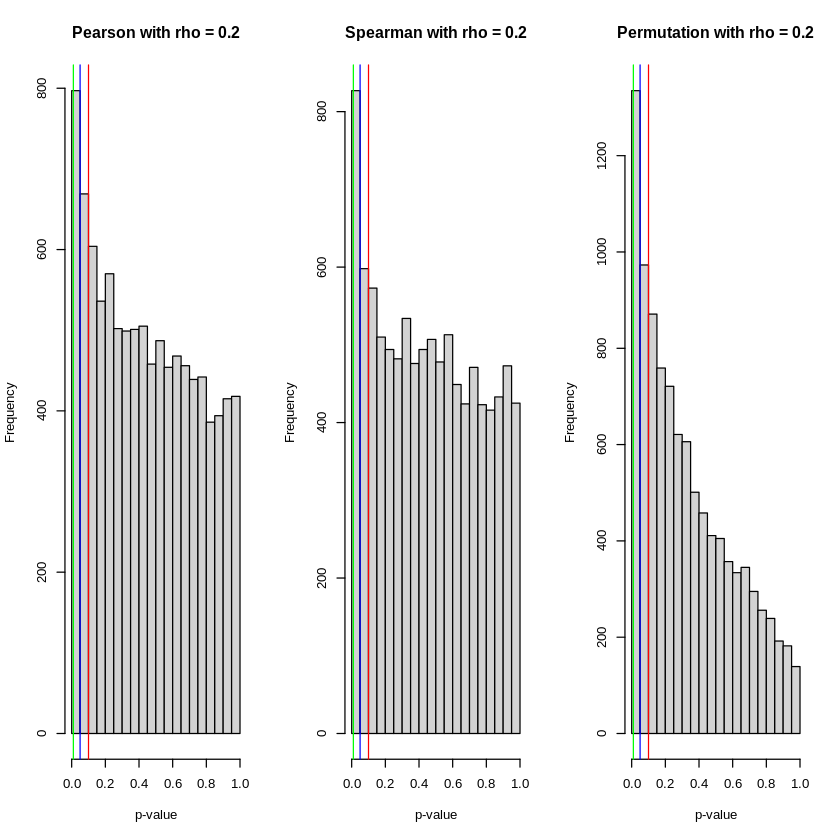

In [ ]:
t_101 = sum(tb[, 1] < 0.1)
t_1005 = sum(tb[, 1] < 0.05)
t_1001 = sum(tb[, 1] < 0.01)
t_201 = sum(tb[, 2] < 0.1)
t_2005 = sum(tb[, 2] < 0.05)
t_2001 = sum(tb[, 2] < 0.01)
t_301 = sum(tb[, 3] < 0.1)
t_3005 = sum(tb[, 3] < 0.05)
t_3001 = sum(tb[, 3] < 0.01)
cat(t_101, t_1005, t_1001, t_201, t_2005, t_2001, t_301, t_3005, t_3001)


par(mfrow = c(1, 3))
hist(tb[, 1], main = "Pearson with rho = 0.2", xlab = "p-value")
abline(v = 0.1, col = "red")
abline(v = 0.05, col = "blue")
abline(v = 0.01, col = "green")
hist(tb[, 2], main = "Spearman with rho = 0.2", xlab = "p-value")
abline(v = 0.1, col = "red")
abline(v = 0.05, col = "blue")
abline(v = 0.01, col = "green")
hist(tb[, 3], main = "Permutation with rho = 0.2", xlab = "p-value")
abline(v = 0.1, col = "red")
abline(v = 0.05, col = "blue")
abline(v = 0.01, col = "green")

In [ ]:
mat1 = matrix(c(1, 0.8, 0.8, 1), nrow = 2)
inv1 = t(chol(mat1))

table = NULL
for (i in 1:10000){
    r3 = rnorm(10)
    r4 = rnorm(10)
    
    number1 = r3 * inv1[2, 1] + r4 * inv1[2, 2]
    d1 = floor(10 * pnorm(r3))
    d2 = floor(10 * number1)
    d3 = cor.test(d1, d2)$p.value

    e3 = cor.test(d1, d2, method = "spearman")$p.value

    table_for_z1 = NULL
    obs = sum(d1 * d2)
    for (j in 1:1000){
    za1 = sample(d1, 10, replace = FALSE)
    za2 = sample(d2, 10, replace = FALSE)
    table_for_z1 = c(table_for_z1, sum(za1 * za2))
    }
    f3 = sum(table_for_z1 > obs) / 1000

    table = c(table, c(d3, e3, f3))
}


In [ ]:
tb1 = matrix(table, ncol = 3, byrow = T)

9149 8425 5984 8678 7790 5340 9638 9132 7003

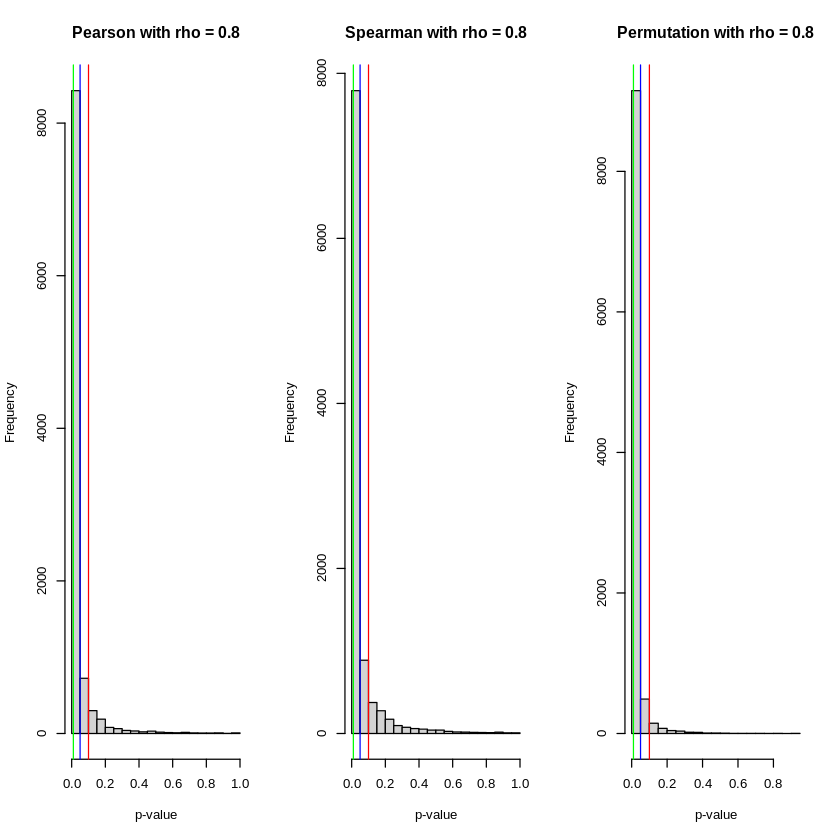

In [ ]:
t1_101 = sum(tb1[, 1] < 0.1)
t1_1005 = sum(tb1[, 1] < 0.05)
t1_1001 = sum(tb1[, 1] < 0.01)
t1_201 = sum(tb1[, 2] < 0.1)
t1_2005 = sum(tb1[, 2] < 0.05)
t1_2001 = sum(tb1[, 2] < 0.01)
t1_301 = sum(tb1[, 3] < 0.1)
t1_3005 = sum(tb1[, 3] < 0.05)
t1_3001 = sum(tb1[, 3] < 0.01)
cat(t1_101, t1_1005, t1_1001, t1_201, t1_2005, t1_2001, t1_301, t1_3005, t1_3001)


par(mfrow = c(1, 3))
hist(tb1[, 1], main = "Pearson with rho = 0.8", xlab = "p-value")
abline(v = 0.1, col = "red")
abline(v = 0.05, col = "blue")
abline(v = 0.01, col = "green")
hist(tb1[, 2], main = "Spearman with rho = 0.8", xlab = "p-value")
abline(v = 0.1, col = "red")
abline(v = 0.05, col = "blue")
abline(v = 0.01, col = "green")
hist(tb1[, 3], main = "Permutation with rho = 0.8", xlab = "p-value")
abline(v = 0.1, col = "red")
abline(v = 0.05, col = "blue")
abline(v = 0.01, col = "green")

5.Using simulation to construct critical values of the Mann-Whitney-Wilcoxon test in the case that $2\leq n_1, n_2 \leq 10$, where n1 and n2 are the number of observations in two populations. (Note: The number of replications shall be at least 10,000.)

In [ ]:
data = NULL
for (i in 2:10){
    for (j in 2:10){
        a = NULL
        for (k in 1:10000){
            x = runif(i)
            y = runif(j)
            z = wilcox.test(x, y)$statistic
            z = as.numeric(z)
            a = c(a, z)
        }
        data = cbind(data, sort(a))
    }
}

df = data.frame(data, row.names = c(1:10000))
critical_value = df[500, ]
critical_matrix = matrix(critical_value, ncol = 9, byrow = TRUE)
print(critical_matrix)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9]
 [1,] 0    0    0    0    1    1    2    2    2   
 [2,] 0    0    1    2    3    3    4    5    5   
 [3,] 0    1    2    3    4    5    6    7    8   
 [4,] 1    2    3    5    6    7    9    10   11  
 [5,] 1    3    4    6    8    9    11   13   15  
 [6,] 1    3    5    7    9    12   13   16   18  
 [7,] 2    4    6    9    11   14   16   19   21  
 [8,] 2    5    7    10   13   16   19   22   25  
 [9,] 2    5    8    11   15   18   22   25   28  


In [13]:
MWWTest = function(seq1, seq2){
    seq = c(seq1, seq2)
    n1 = length(seq1)
    n2 = length(seq2)

    r1 = rank(seq)[1:n1]
    r2 = rank(seq)[-c(1:n1)]
    
    W1 = sum(r1)
    W2 = sum(r2)
    
    U1 = n1 * n2 + (n1 * (n1 + 1) / 2) - W1
    U2 = n1 * n2 + (n2 * (n2 + 1) / 2) - W2
    
    U = min(U1, U2)
    Z = (U - n1 * n2 / 2) / sqrt(n1 * n2 * (n1 + n2 +1) / 12)
    df = data.frame(U1, U2)
    return (U)
}

In [14]:
data = NULL
for (i in 2:10){
    for (j in 2:10){
        x = NULL
        for (k in 1:10000){
            y = MWWTest(runif(i), runif(j))
            x = c(x, y)
        }
        data = cbind(data, sort(as.numeric(x)))
    }
}

In [15]:
df = data.frame(data, row.names = c(1:10000))
critical = df[500, ]
cri_mat = matrix(critical, ncol = 9, byrow = TRUE)
print(cri_mat)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9]
 [1,] 0    0    0    0    0    0    0    1    1   
 [2,] 0    0    0    1    2    2    3    3    3   
 [3,] 0    0    1    2    3    4    5    5    6   
 [4,] 0    1    2    3    4    6    7    8    9   
 [5,] 0    2    3    4    6    8    9    10   12  
 [6,] 0    2    4    6    8    9    11   13   15  
 [7,] 1    3    5    7    9    11   14   16   18  
 [8,] 1    3    5    8    10   13   16   18   21  
 [9,] 1    4    7    9    12   15   18   21   24  


In [16]:
cri_df = data.frame(cri_mat, row.names = c(2:10))
colnames(cri_df) = c(2:10)
print(cri_df)

   2 3 4 5  6  7  8  9 10
2  0 0 0 0  0  0  0  1  1
3  0 0 0 1  2  2  3  3  3
4  0 0 1 2  3  4  5  5  6
5  0 1 2 3  4  6  7  8  9
6  0 2 3 4  6  8  9 10 12
7  0 2 4 6  8  9 11 13 15
8  1 3 5 7  9 11 14 16 18
9  1 3 5 8 10 13 16 18 21
10 1 4 7 9 12 15 18 21 24


6.Similar to what Efron did in the Law school data example, compute the bootstrap simulation for 50, 100, ..., 10,000 replications. But, instead of using the original 15 observations, we want to know if the number of observations plays an important role. Randomly select 10, 15, 20, and 25 observations and then see if the bootstrap variance converges as the number of replications increases. (Note: You also need to compare your results with that of population.)


|school|LSAT|GPA|school|LSAT|GPA|school|LSAT|GPA|school|LSAT|GPA|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|1|622|3.23|22|614|3.19|43|573|2.85|63|572|3.08|
|2|542|2.83|23|628|3.03|44|644|3.38|64|610|3.13|
|3|579|3.24|24|575|3.01|(45)|545|2.76|65|562|3.01|
|(4)|653|3.12|25|662|3.39|46|645|3.27|66|635|3.30|
|5|606|3.09|26|627|3.41|(47)|651|3.36|67|614|3.35|
|(6)|576|3.39|27|608|3.04|48|562|3.19|68|546|2.82|
|7|620|3.10|28|632|3.29|49|609|3.17|69|598|3.20|
|8|615|3.40|29|587|3.16|(50)|555|3.00|(70)|666|3.44|
|9|553|2.97|30|581|3.17|51|586|3.11|71|570|3.01|
|10|607|2.91|(31)|605|3.13|(52)|580|3.07|72|570|2.92|
|11|558|3.11|32|704|3.36|(53)|594|2.96|73|605|3.45|
|12|596|3.24|33|477|2.57|54|594|3.05|74|565|3.15|
|(13)|635|3.30|34|591|3.02|55|560|2.93|75|686|3.50|
|14|581|3.22|(35)|578|3.03|56|641|3.28|76|608|3.16|
|(15)|661|3.43|(36)|572|2.88|57|512|3.01|77|595|3.19|
|16|547|2.91|37|615|3.37|58|631|3.21|78|590|3.15|
|17|599|3.23|38|606|3.20|59|597|3.32|(79)|558|2.81|
|18|646|3.47|39|603|3.23|60|621|3.24|80|611|3.16|
|19|622|3.15|40|535|2.98|61|617|3.03|81|564|3.02|
|20|611|3.33|41|595|3.11|62|637|3.33|(82)|575|2.74|
|21|546|2.99|42|575|2.92|||||||


[1] 0.69345000 0.03707088


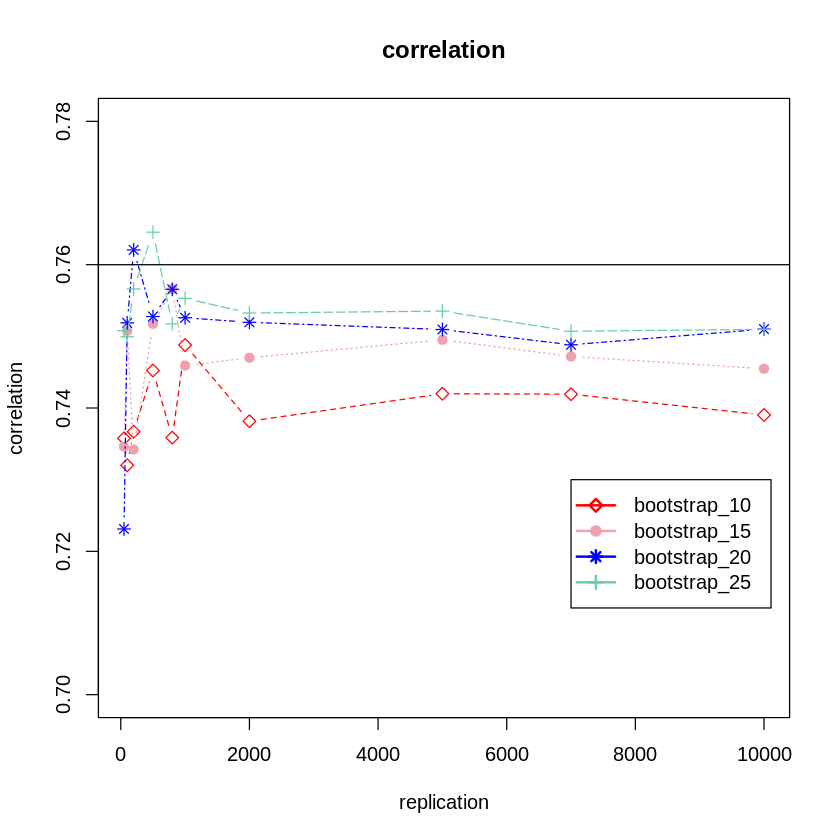

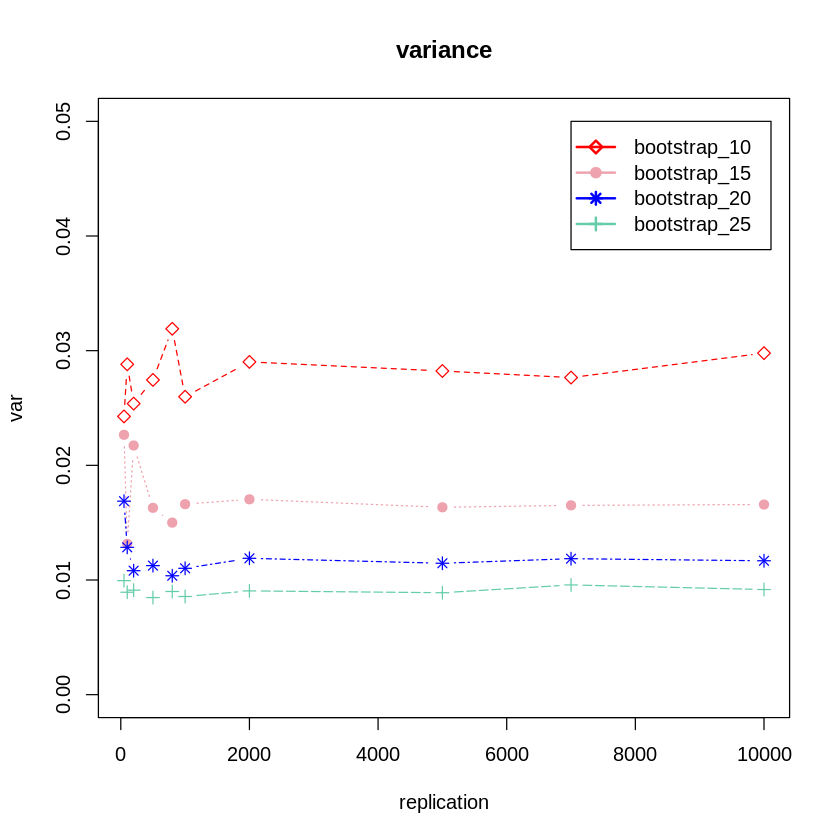

In [ ]:
library(boot)
law82 = read.table("http://www2.stat.duke.edu/~oma9/STA111_SummerI_2016/Labs/Law82.txt",header=T)
len = dim(law82)[1]

bootstrap = function (rep,n){

    # sample
    # 兩變數各自variance
    # var_LSAT = round(mean(apply(matrix(law82[, 1][s], nrow = n, ncol = rep), 2, var)), 3)
    # var_GPA = round(mean(apply(matrix(law82[, 2][s], nrow = n, ncol = rep), 2, var)), 3)
    # correlation
    corr = NA
    for (i in 1:rep){
        s = sample(len, n, replace = TRUE)
        corr[i] = round(cor(law82[s, 1], law82[s, 2]), 4)
    }
    # corr = mean(corr)
    # print 結果
    # result = c(var_LSAT, var_GPA,corr)
    result = c(mean(corr), var(corr))
    return(result)
}

print(bootstrap(10, 10))

# replication function
replication = function(n, num){
    vec = 0
    for (k in num){
        vec = rbind(vec, bootstrap(rep = k, n))
    }
    vec = vec[-1, ]
    rownames(vec) = num
    colnames(vec) = c("mean_corr", "var_corr")
    return(vec)
}


# simulate
num = c(50, 100, 200, 500, 800, 1000, 2000, 5000, 7000, 10000)
bootstrap_10 = replication(n = 10, num)
bootstrap_15 = replication(n = 15, num)
bootstrap_20 = replication(n = 20, num)
bootstrap_25 = replication(n = 25, num)

# population variance
a = cor(law82$LSAT, law82$GPA)


# graph
# correlarion
plot(x = num, y = bootstrap_10[, 1], xlab = "replication", ylab = "correlation",
     main = "correlation", ylim = c(0.7, 0.78), type = "b", col = "red", pch = 5, lty = 2)
lines(x = num, y = bootstrap_15[, 1], type = "b", col = "lightpink2", pch = 19, lty = 3)
lines(x = num, y = bootstrap_20[, 1], type = "b", col = "blue", pch = 8,lty = 4)
lines(x = num,y = bootstrap_25[, 1], type = "b", col = "mediumaquamarine", pch = 3, lty = 5)
abline(h = a, col = "black")
legend(7000, 0.73, c("bootstrap_10", "bootstrap_15", "bootstrap_20", "bootstrap_25"), lwd = rep(2,4), col = c("red", "lightpink2", "blue", "mediumaquamarine"), pch = c(5, 19, 8, 3))

# variance
plot(x = num,y = bootstrap_10[, 2], xlab = "replication", ylab = "var",
     main = "variance", ylim = c(0, 0.05), type = "b", col = "red", pch = 5, lty = 2)
lines(x = num, y = bootstrap_15[, 2], type = "b", col = "lightpink2", pch = 19, lty = 3)
lines(x = num, y = bootstrap_20[, 2], type = "b", col = "blue", pch = 8,lty = 4)
lines(x = num, y = bootstrap_25[, 2], type = "b", col = "mediumaquamarine", pch = 3,lty = 5)
legend(7000, 0.05, c("bootstrap_10", "bootstrap_15", "bootstrap_20", "bootstrap_25"), lwd = rep(2, 4), col = c("red", "lightpink2", "blue", "mediumaquamarine"), pch = c(5, 19, 8, 3))

In [ ]:
# prepare the data
data = read.csv("6-data.csv", header = TRUE)

In [ ]:
# population mean & var
LSAT = data[, 2]
GPA = data[, 3]
cat("mean of LSAT: ", mean(LSAT), ",","var of LSAT: ", var(LSAT), "\n")
cat("mean of GPA: ", mean(GPA), ",","var of GPA: ", var(GPA), "\n")
cat("correlation between GPA and LSAT:", cor(GPA, LSAT))
plot(LSAT, GPA)

In [ ]:
bootstrap_LSAT = function(number, times){
    m = NULL
    v = NULL
    n = as.numeric(number)
    t = as.numeric(times)
    for (i in 1:t){
        x = sample(LSAT, n, replace = TRUE)
        m = c(m, mean(x))
        v = c(v, var(x))
    }
    df = data.frame(mean = m, variance = v)
    return (df)
}

bootstrap_GPA = function(number, times){
    m = NULL
    v = NULL
    n = as.numeric(number)
    t = as.numeric(times)
    for (i in 1:t){
        x = sample(GPA, n, replace = TRUE)
        m = c(m, mean(x))
        v = c(v, var(x))
    }
    df = data.frame(mean = m, variance = v)
    return (df)
}

bootstrap_cor = function(numbers, times){
    n = as.numeric(numbers)
    t = as.numeric(times)
    c = NULL
    for (i in 1:t){
        x = sample(LSAT, n, replace = TRUE)
        y = sample(GPA, n, replace = TRUE)
        
        o = cor(x, y)
        c = c(c, o)
    }
    hist(c)
    print(var(c))
    return (c)
}


7.(Bonus!) The task is to use SVD to compress the lion image, similar to the handout on my webpage. In addition to the SVD, you need to apply other non-linear data reduction methods and compare their differences.

(不寫)